## Plotting

In [1]:
from optiwindnet.api import WindFarmNetwork
import numpy as np

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


### Create a sample network

In [2]:
substationsC = np.array([[0, 0],], dtype=float)
turbinesC = np.array(
    [[0, 1], [1, 1]],
    dtype=float
)

In [3]:
wfn = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=[(5, 10)])

<Axes: >

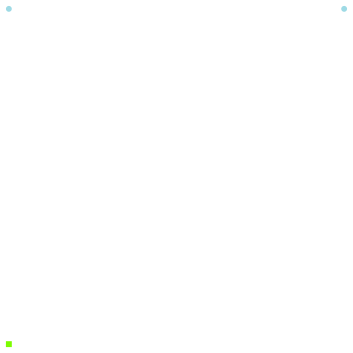

In [4]:
# set Matplotlib option to generate inline SVG
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['svg.fonttype'] = 'none'

# plot location
wfn.plot_location()

<Axes: >

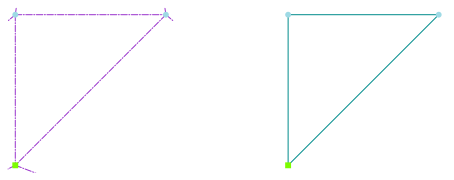

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor='none', figsize=(9, 3))
wfn.plot_navigation_mesh(ax=ax1)
wfn.plot_available_links(ax=ax2)

Optimize

In [6]:
res_optimize = wfn.optimize()

<Axes: >

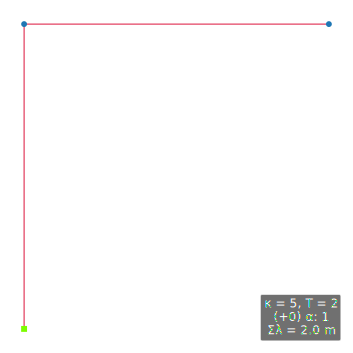

In [7]:
wfn.plot_selected_links()

<Axes: >

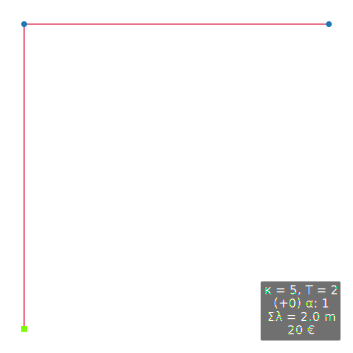

In [8]:
wfn.plot()

In [9]:
grad_wts, grad_ss = wfn.gradient()
print('WTs gradient: ', grad_wts)
print('SS gradient: ', grad_ss)

WTs gradient:  [[-10.  10.]
 [ 10.   0.]]
SS gradient:  [[  0. -10.]]


In [10]:
grad_wts, grad_ss = wfn.gradient(gradient_type='length')
print('WTs gradient: ', grad_wts)
print('SS gradient: ', grad_ss)

WTs gradient:  [[-1.  1.]
 [ 1.  0.]]
SS gradient:  [[ 0. -1.]]


In [11]:
grad_wts, grad_ss = wfn.gradient(substationsC=np.array([[0.5, 0],], dtype=float), gradient_type='length')
print('WTs gradient: ', grad_wts)
print('SS gradient: ', grad_ss)

WTs gradient:  [[-1.4472136   0.89442719]
 [ 1.          0.        ]]
SS gradient:  [[ 0.4472136  -0.89442719]]


In [12]:
grad_wts, grad_ss = wfn.gradient(substationsC=np.array([[-1, 1],], dtype=float), gradient_type='length')
print('WTs gradient: ', grad_wts)
print('SS gradient: ', grad_ss)

WTs gradient:  [[0. 0.]
 [1. 0.]]
SS gradient:  [[-1.  0.]]
